In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [14]:
df = pd.read_csv("/Users/bhojraj/Downloads/ads (1).csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [16]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [17]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [18]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## The first column doesnt add any value in the data so, we will remove the column(Unnamed:0)

In [19]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [21]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Feature selection using Correlation

# One Feature Selection

In [25]:
correlation = df.corr()

<Axes: >

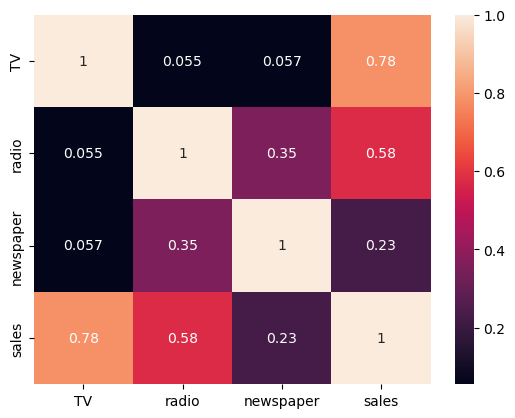

In [27]:
sns.heatmap(correlation, annot = True)

## The tv colulmn has storng positive correlation with sales.
## The radio column has medium positive correlation with sales.
## The newspaper column has low positive correlation with sales.

### Here, we will drop the radion and newspaper column because the independent variable most not be correlated with each other (ie, the radio and tv has a correlatioin of 0.055 and newspaper and tv has a correlation of 0,057)

## Here, we will use tv because it has strongest correlation with sales.

In [32]:
x = df[['TV']]
y = df.sales

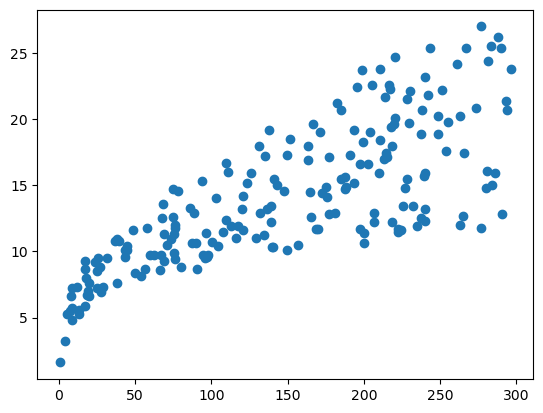

In [33]:
plt.scatter(x=x,y=y)

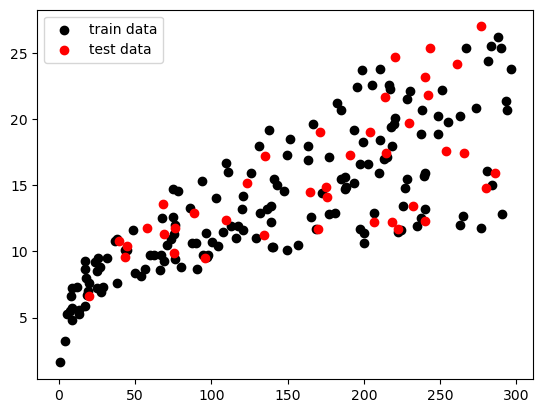

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)
plt.scatter(x=X_train,y=y_train,label = 'train data', color = 'black')
plt.scatter(x = X_test,y = y_test,label ='test data', color ='red')
plt.legend()
plt.show()

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

In [51]:
y_pred

array([17.19434775, 13.36977723, 17.46375146, 20.18665324,  9.00639928,
       18.49325849, 13.3264802 , 15.05355041, 11.11352116, 16.05900355,
       19.43617148, 18.03142356, 10.49774125, 12.78767278, 19.07536294,
       20.62443427, 19.64303504, 14.77933592,  8.93423758, 17.13661838,
       18.40185366, 20.345409  , 18.5654202 , 11.46951892, 18.40666445,
       17.90634327, 15.31814334,  9.63180075, 16.68440501,  8.76586026,
       10.54103827, 10.19466208, 16.81429609, 15.28927866, 15.106469  ,
        7.79889337, 17.56477785, 10.15617583, 17.37715741, 12.14783897])

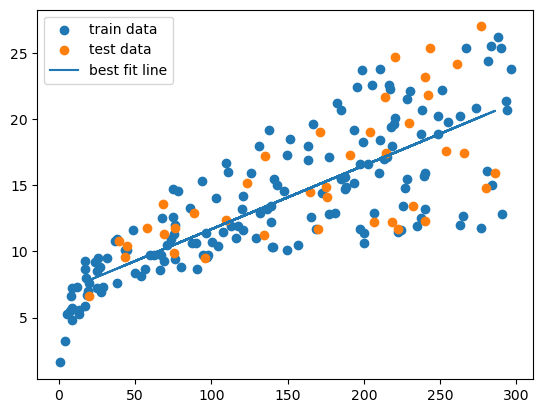

In [53]:
plt.scatter(X_train,y_train,label = 'train data')
plt.scatter(X_test,y_test, label = 'test data')
plt.plot(X_test,y_pred,label = 'best fit line')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
r2 = r2_score(y_true=y_test,y_pred = y_pred)
print(f'mean squared error = {mse}')
print(f'mean absolute error = {mae}')
print(f'r2 score = {r2}')

mean squared error = 13.062266288305668
mean absolute error = 2.990565035759226
r2 score = 0.4613874633681754


## Suppose we put 100 ads in tv,

In [59]:
model.predict([[100]])

/Users/bhojraj/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.67638248])

## so from 100 ads in tv we can sell 11 products

## Similarly, the ad in the newspaper and radio might aslo increase the sales of the products.

# Multifeature Selection

In [61]:
x = df[['TV','newspaper','radio']]
y = df.sales

In [63]:
x.head()

,TV,newspaper,radio
0,230.1,69.2,37.8
1,44.5,45.1,39.3
2,17.2,69.3,45.9
3,151.5,58.5,41.3
4,180.8,58.4,10.8


## split the Dataset

In [64]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X_test)

In [66]:
y_pred

array([17.2752476 , 16.74844593, 21.97674588, 24.59448907, 12.11768831,
       21.02033688, 10.15643252, 12.34380805, 11.70461016, 17.02091374,
       22.77376935, 15.3468411 ,  8.47830473, 14.9155752 , 18.61592987,
       18.78535771, 18.92262443, 14.411111  ,  9.65948532, 20.60497137,
       14.91294261, 17.84682569, 23.05099966,  7.74477655, 21.55734502,
       19.45793001, 13.93893979, 11.55855542, 18.37843109, 12.19352005,
       11.35032808,  9.91369153, 13.57335272, 15.18177818, 18.06379607,
        6.80705318, 14.14598886, 14.14649594, 14.1536933 , 10.69806825])

##  Suppose we put 100 ads in TV, 15 ads in radio and 10 ads in newspaper we will get following sales

In [67]:
model.predict([[100,15,10]])

/Users/bhojraj/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.47456584])

### Hence, we will get around 9 sales 

# Using Lasso

In [69]:
x = df[['TV','newspaper','radio']]
y = df.sales

In [70]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 4)
from sklearn.linear_model import Lasso

In [71]:
model = Lasso()

In [73]:
 model.fit(X_train,y_train)

Lasso()

In [74]:
y_pred = model.predict(X_test)

In [75]:
y_pred

array([17.2721772 , 16.66225658, 21.86488484, 24.46618914, 12.04992984,
       20.94817821, 10.24152924, 12.40516786, 11.68420955, 16.99502712,
       22.66970649, 15.40769069,  8.54384016, 14.87169358, 18.61313525,
       18.82013945, 18.93372232, 14.41227008,  9.65771112, 20.51020933,
       14.98388506, 17.89308818, 22.92436944,  7.84896635, 21.47160671,
       19.39567134, 13.97704961, 11.52464285, 18.32452937, 12.13062194,
       11.34166143,  9.93381068, 13.64779613, 15.18003819, 17.98575887,
        6.84972713, 14.21353079, 14.05707303, 14.22377381, 10.73746053])

In [76]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
r2 = r2_score(y_true=y_test,y_pred = y_pred)
print(f'mean squared error = {mse}')
print(f'mean absolute error = {mae}')
print(f'r2 score = {r2}')

mean squared error = 2.3150521559315975
mean absolute error = 1.238983302636535
r2 score = 0.9045405991104601


In [77]:
model.predict([[100,15,10]])

/Users/bhojraj/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([9.53867405])